# Model Comparison and Final Selection

---

### 1. Objective
The objective of this notebook is to compare the performance of our final, tuned **Random Forest** and **XGBoost** models. We will use key performance metrics, visualize the comparison, and provide a definitive recommendation based on the model that best aligns with our primary business goal: proactively identifying employees at risk of attrition.

### 2. Final Performance Metrics

In this section, we consolidate the performance metrics from the final, hyperparameter-tuned versions of both models. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

metrics_data = {
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [0.84, 0.81],  # Overall accuracy
    'Recall (Yes)': [0.43, 0.60],  # Recall for the 'Yes' (Attrition) class
    'Precision (Yes)': [0.42, 0.42], # Precision for the 'Yes' (Attrition) class
    'F1-Score (Yes)': [0.45, 0.50], # F1-Score for the 'Yes' (Attrition) class
    'ROC-AUC': [0.79, 0.77]
}

df_metrics = pd.DataFrame(metrics_data)

print("Model Performance Metrics Summary:")
df_metrics.set_index('Model')

Model Performance Metrics Summary:


,Accuracy,Recall (Yes),Precision (Yes),F1-Score (Yes),ROC-AUC
Model,,,,,
Random Forest,0.84,0.43,0.42,0.45,0.79
XGBoost,0.81,0.60,0.42,0.50,0.77


### 3. Visual Comparison of Models

Bar charts provide a clear visual comparison of the key performance metrics, especially for our target class ('Yes' for Attrition).

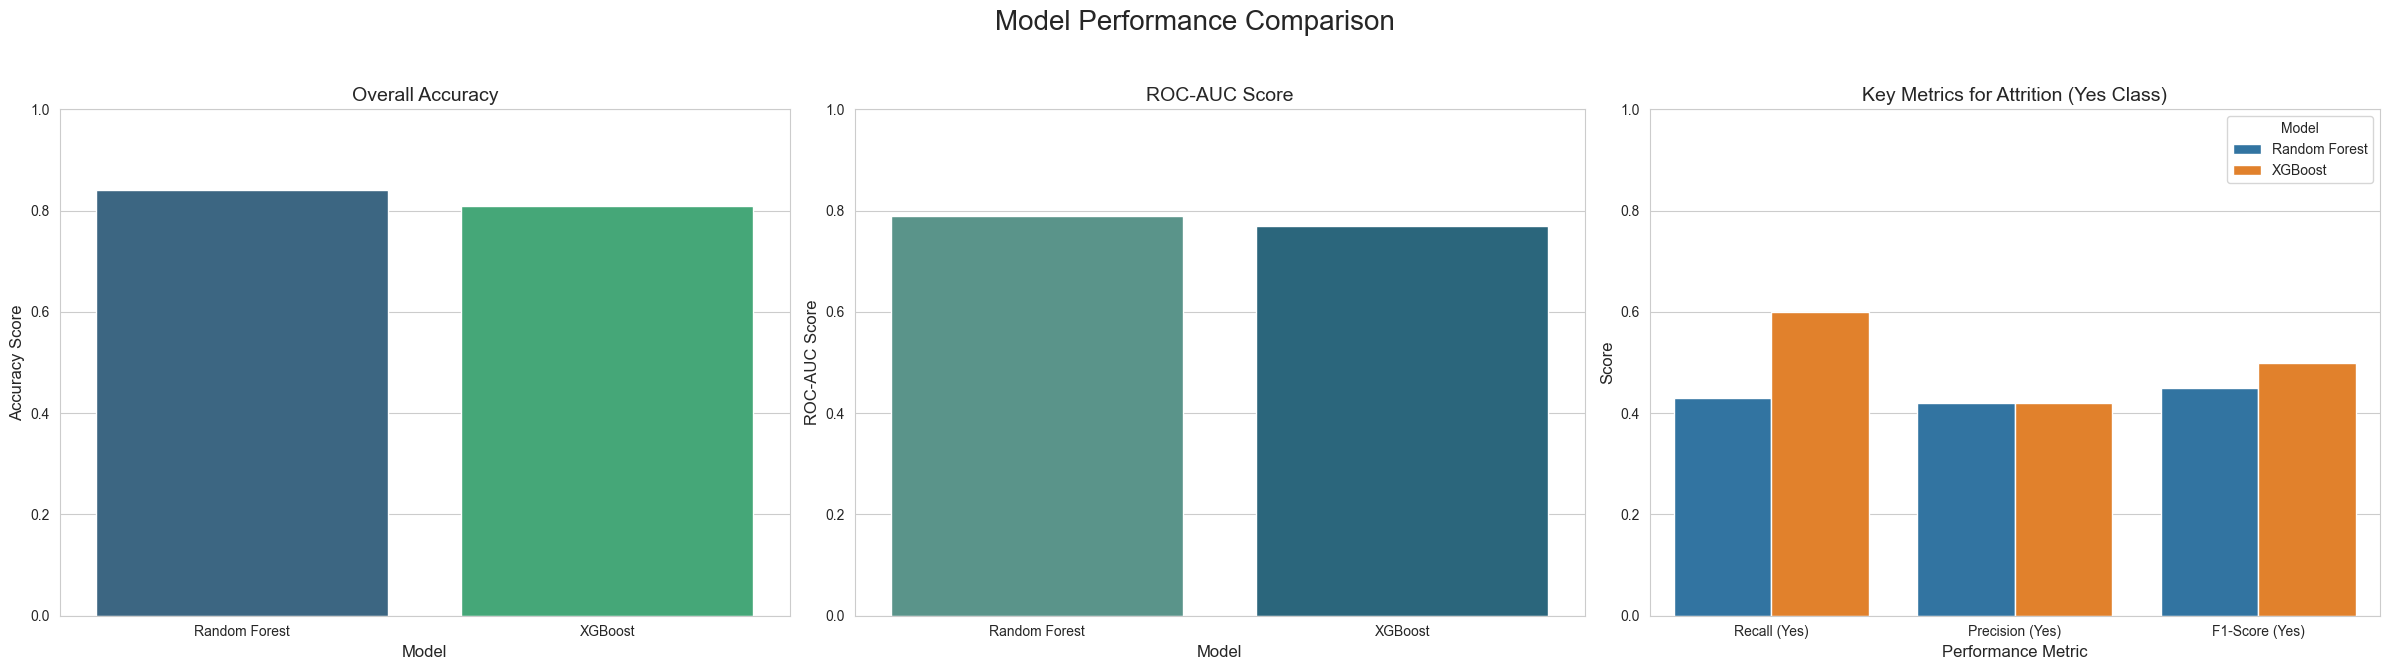

In [5]:
# Set plot style
sns.set_style("whitegrid")

# Create a figure for 3 plots
fig, axes = plt.subplots(1, 3, figsize=(24, 7))
fig.suptitle('Model Performance Comparison', fontsize=20)

# --- Plot 1: Overall Accuracy ---
sns.barplot(x='Model', y='Accuracy', data=df_metrics, ax=axes[0], hue='Model', palette='viridis', legend=False)
axes[0].set_title('Overall Accuracy', fontsize=14)
axes[0].set_ylabel('Accuracy Score', fontsize=12)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylim(0, 1.0)

# --- Plot 2: ROC AUC Score ---
sns.barplot(x='Model', y='ROC-AUC', data=df_metrics, ax=axes[1], hue='Model', palette='crest', legend=False)
axes[1].set_title('ROC-AUC Score', fontsize=14)
axes[1].set_ylabel('ROC-AUC Score', fontsize=12)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylim(0, 1.0)

# --- Plot 3: Key Metrics for Attrition (Yes Class) ---
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score',
                                value_vars=['Recall (Yes)', 'Precision (Yes)', 'F1-Score (Yes)'])

sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted, ax=axes[2])
axes[2].set_title('Key Metrics for Attrition (Yes Class)', fontsize=14)
axes[2].set_ylabel('Score', fontsize=12)
axes[2].set_xlabel('Performance Metric', fontsize=12)
axes[2].set_ylim(0, 1.0)
axes[2].legend(title='Model')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 4. Conclusion and Final Recommendation

Based on the performance metrics and visualizations above, we can draw a clear conclusion about which model best serves our business needs.

#### Discussion

The most critical business objective for this project is to correctly identify as many employees at risk of leaving as possible, enabling proactive intervention. Therefore, our primary evaluation metric is **Recall for the 'Yes' (Attrition) class**.

From the analysis:

- The **XGBoost** model achieved a **Recall of 0.60**, which is significantly higher than the Random Forest model’s Recall of 0.43. This means the XGBoost model successfully identified 60 % of all employees who were likely to leave, compared to only 43 % for Random Forest.
- Both models share an identical **Precision of 0.42**. This indicates that when either model flags an employee as an attrition risk, it is correct 42 % of the time. Given that the precision is equal, the superior recall of XGBoost becomes the decisive factor.
- The **F1-Score**, which represents the balance between precision and recall, is also higher for the XGBoost model (0.50 vs. 0.45), confirming its better overall performance for our specific goal.

While Random Forest has a slightly higher Overall Accuracy and ROC-AUC score, these metrics are less important than recall for our business case. The cost of a **False Negative** (failing to identify an employee who then leaves) is far greater than the cost of a **False Positive** (incorrectly flagging a stable employee for a follow-up conversation). The XGBoost model’s ability to find more true attrition risks makes it the clear choice.

#### Recommended Model

**The XGBoost classifier is the recommended model for deployment.**

It demonstrates a superior ability to meet the primary business objective of identifying a majority of at-risk employees. Its higher Recall and F1-Score make it the more robust and effective tool for enabling the HR department to take proactive retention measures.